# Importing require library

In [83]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import plotly.express as px
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [84]:
# Importing Insurance Claims dataset Csv file using pandas
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [85]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

### Statistical Analysis

In [86]:
# This will check the duplicate data for all columns.
df.duplicated().sum()  

1663

In [87]:
df.drop_duplicates(keep='last',inplace= True)

In [88]:
df.isin([' ','NA','-']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [89]:
##Checking unique values:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [90]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [91]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [92]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [93]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [94]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

### Missing value check

In [95]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3236       47.855664
Evaporation              2921       43.197279
Cloud3pm                 1902       28.127773
Cloud9am                 1866       27.595386
Pressure3pm              1311       19.387755
Pressure9am              1308       19.343390
WindGustDir               942       13.930790
WindGustSpeed             942       13.930790
WindDir9am                794       11.742088
WindDir3pm                294        4.347826
RainTomorrow              138        2.040816
RainToday                 138        2.040816
Rainfall                  138        2.040816
WindSpeed3pm              100        1.478852
Humidity3pm                96        1.419698
Temp3pm                    92        1.360544
MinTemp                    70        1.035197
WindSpeed9am               63        0.931677
MaxTemp                    57        0.842946
Humidity9am                54        0.798580
Temp9am                    51     

Maximum columns have missing values so we have impute some values in it.

### Missing value imputation

In [96]:
from sklearn.impute import SimpleImputer
## Startegy most_frequent works both for string or numeric data ,so I am using most_frequent.

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
for i in columns:
    df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))

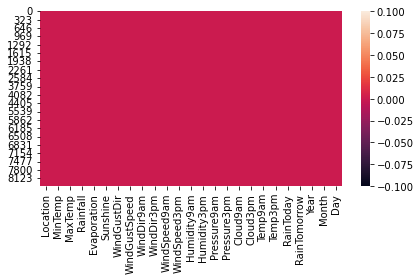

In [97]:
# Heatmap of missing value
sns.heatmap(df.isnull())
plt.show()

No missing values

### Statistical Matrix

In [98]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Year', 'Month', 'Day'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [99]:
Category = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
    
Numerical = ['Year', 'Month', 'Day','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.0,13.110086,5.540674,-2.0,9.0,13.2,17.4,28.5
MaxTemp,6762.0,24.055368,6.147821,8.2,19.4,23.4,28.4,45.5
Rainfall,6762.0,2.723410,10.490138,0.0,0.0,0.0,0.8,371.0
Evaporation,6762.0,4.739796,3.405391,0.0,4.0,4.0,5.0,145.0
Sunshine,6762.0,4.114655,4.797188,0.0,0.0,0.2,9.2,13.9
WindGustSpeed,6762.0,38.980775,13.376460,7.0,30.0,39.0,46.0,107.0
WindSpeed9am,6762.0,12.663117,9.864326,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6762.0,17.444395,9.604527,0.0,9.0,17.0,24.0,83.0
Humidity9am,6762.0,67.510500,17.182756,10.0,56.0,68.0,80.0,100.0
Humidity3pm,6762.0,50.403727,18.505890,6.0,38.0,50.0,62.0,99.0


In [101]:
df[Category].describe().T

,count,unique,top,freq
Location,6762,12,PerthAirport,1204
WindGustDir,6762,16,E,1460
WindDir9am,6762,16,N,1403
WindDir3pm,6762,16,SE,971
RainToday,6762,2,No,5190
RainTomorrow,6762,2,No,5190


In [102]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("*"*50)

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
**************************************************
WindGustDir
E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64
**************************************************
WindDir9am
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64
**************************************************
WindDir3pm
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400

###### Summary of categorical variables 
There is a date variable. It is denoted by Date column.

There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and 
RainTomorrow.

There are two binary categorical variables - RainToday and RainTomorrow.

RainTomorrow is the target variable.

# Exploratory Data Analysis

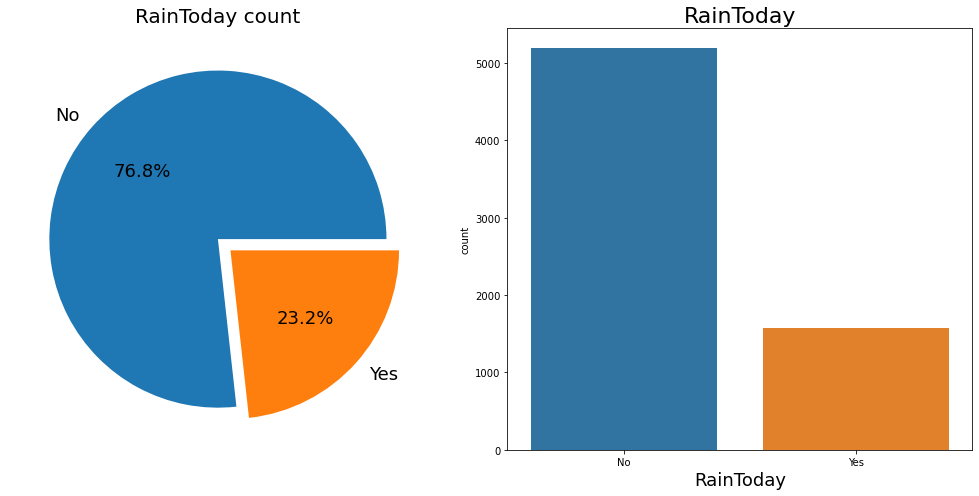

In [103]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(14,7))
df['RainToday'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',fontsize=18, ax=ax[0])
ax[0].set_title('RainToday count', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('RainToday',data=df,ax=ax[1])
ax[1].set_title('RainToday',fontsize=22)
ax[1].set_xlabel("RainToday",fontsize=18)
plt.show()

Probability of rainfall is less 23.2%

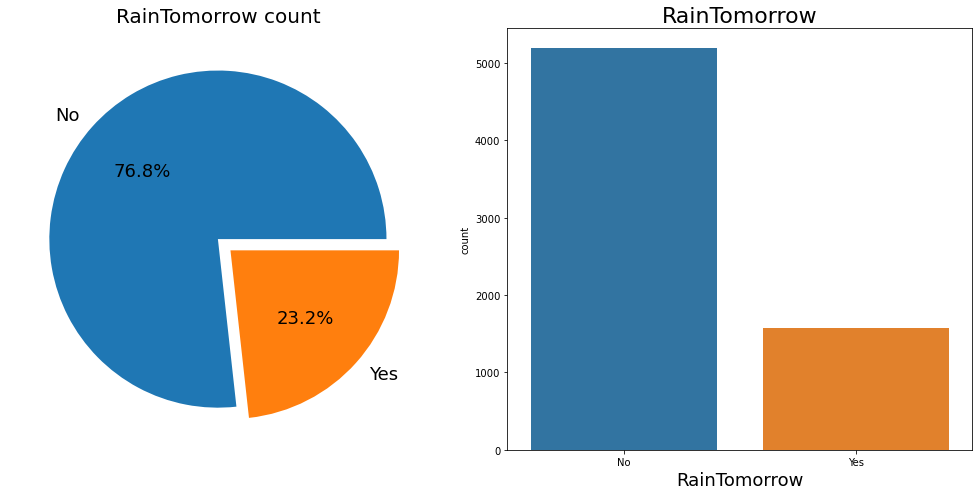

In [104]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(14,7))
df['RainTomorrow'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',fontsize=18, ax=ax[0])
ax[0].set_title('RainTomorrow count', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('RainTomorrow',data=df,ax=ax[1])
ax[1].set_title('RainTomorrow',fontsize=22)
ax[1].set_xlabel("RainTomorrow",fontsize=18)
plt.show()

The number of unique values in RainTomorrow variable is 2.

The two unique values are No and Yes.

Out of the total number of RainTomorrow values, No appears 76.8% times and Yes appears 23.2% times.

From count plot we can say dataset is imbalanced in nature.

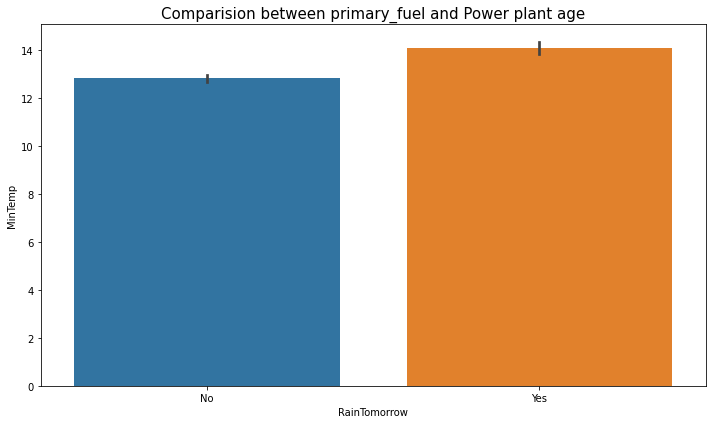

In [105]:
# Power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=15)
a= sns.barplot(x = "RainTomorrow", y = "MinTemp", data = df)
a.set_xlabel('RainTomorrow',fontsize=10)
a.set_ylabel('MinTemp',fontsize=10)
plt.show()

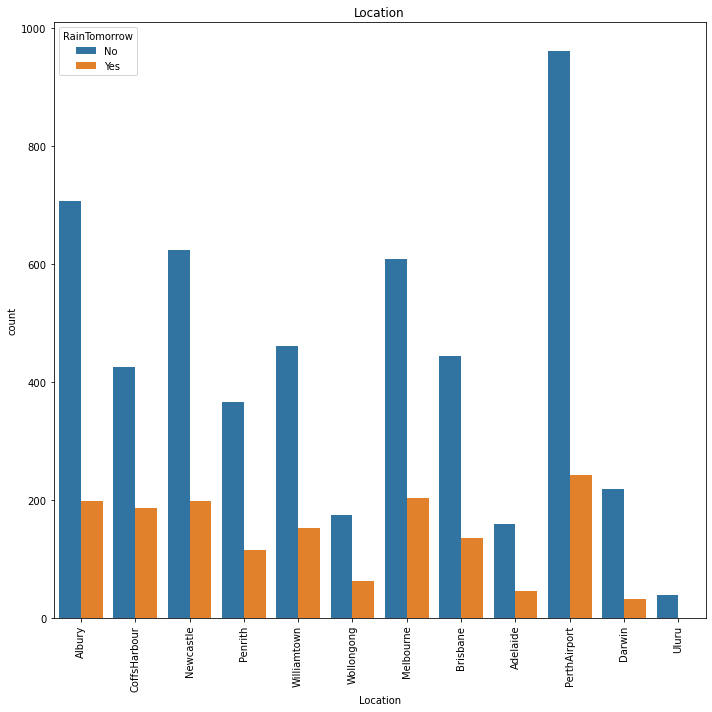

In [106]:
plt.figure(figsize = (10,10))
sns.countplot( df['Location'],hue=df['RainTomorrow'],data=df )
plt.xlabel('Location')
plt.title('Location')
plt.xticks(rotation=90)
plt.show()

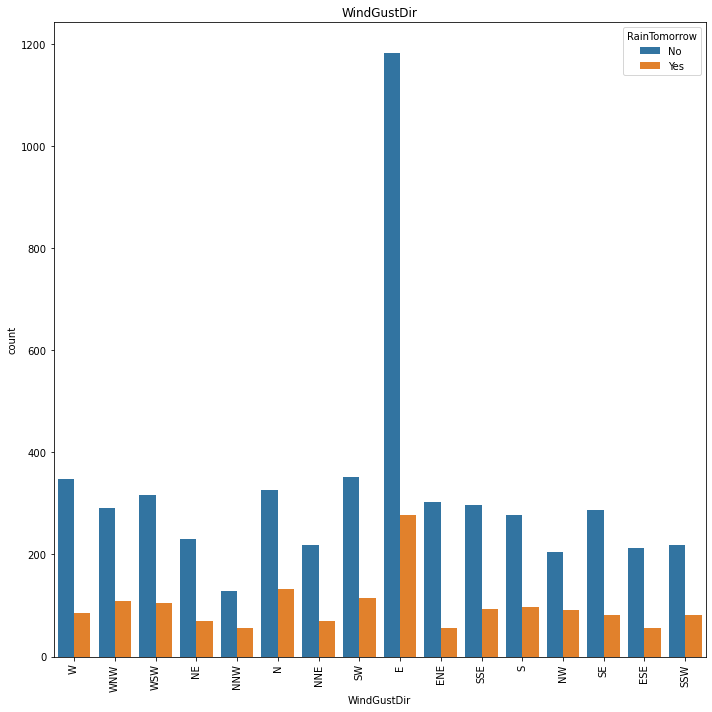

In [107]:
plt.figure(figsize = (10,10))
sns.countplot( df['WindGustDir'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindGustDir')
plt.title('WindGustDir')
plt.xticks(rotation=90)
plt.show()

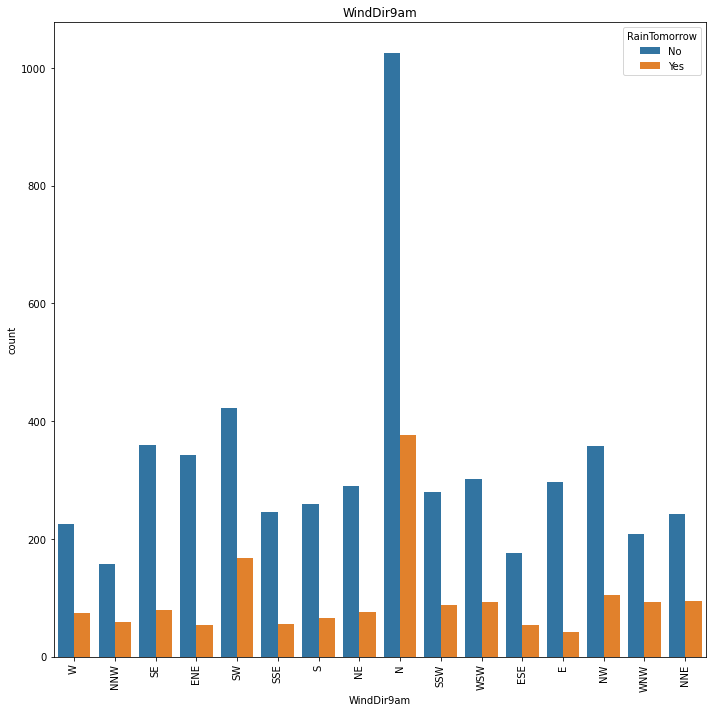

In [108]:
plt.figure(figsize = (10,10))
sns.countplot( df['WindDir9am'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir9am')
plt.title('WindDir9am')
plt.xticks(rotation=90)
plt.show()

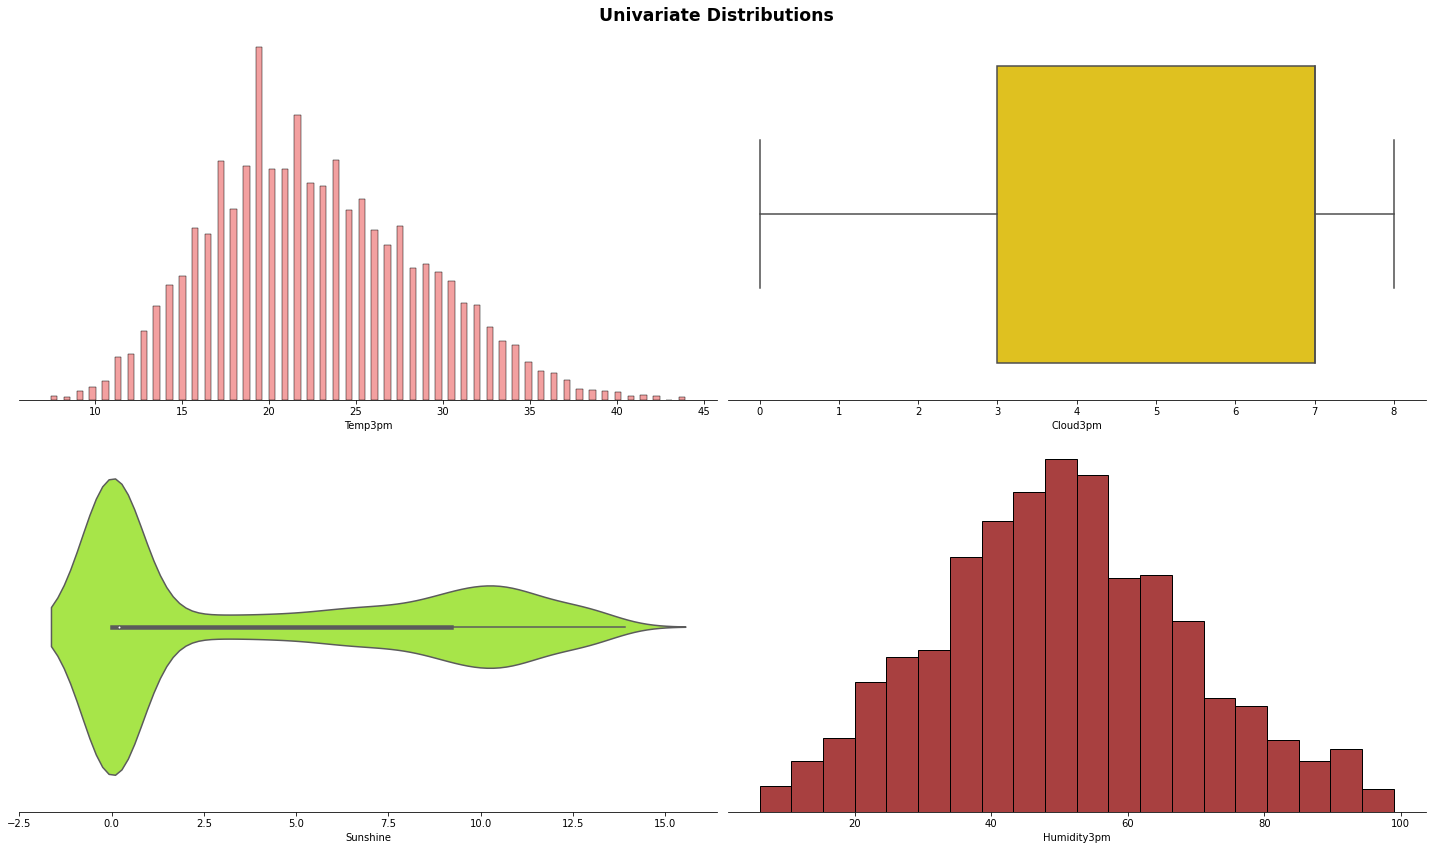

In [109]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Univariate Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="Temp3pm",data=df,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="Humidity3pm",data=df,ax=ax[3],bins=20,color='darkred')
sns.boxplot(x='Cloud3pm',data=df,ax=ax[1],color='gold')
sns.violinplot(x="Sunshine",data=df,ax=ax[2],color="greenyellow")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

In [110]:
px.scatter(df, x="MinTemp", y="MaxTemp", color="Rainfall")

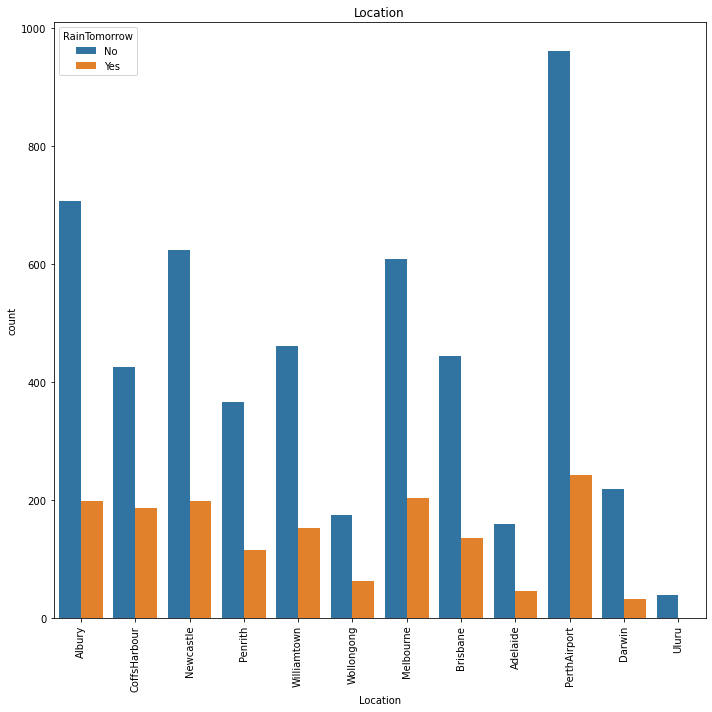

In [111]:
plt.figure(figsize = (10,10))
sns.countplot( df['Location'],hue=df['RainTomorrow'],data=df )
plt.xlabel('Location')
plt.title('Location')
plt.xticks(rotation=90)
plt.show()


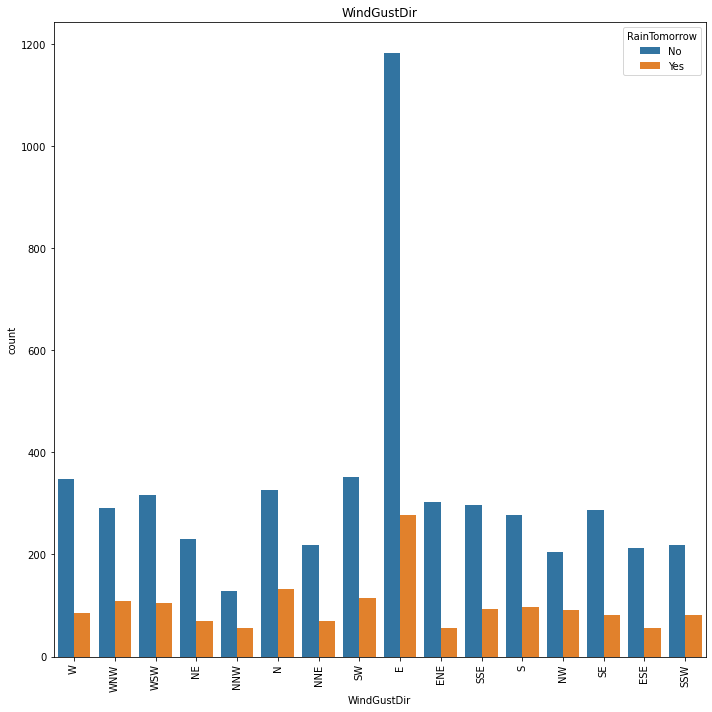

In [112]:
plt.figure(figsize = (10,10))
sns.countplot( df['WindGustDir'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindGustDir')
plt.title('WindGustDir')
plt.xticks(rotation=90)
plt.show()

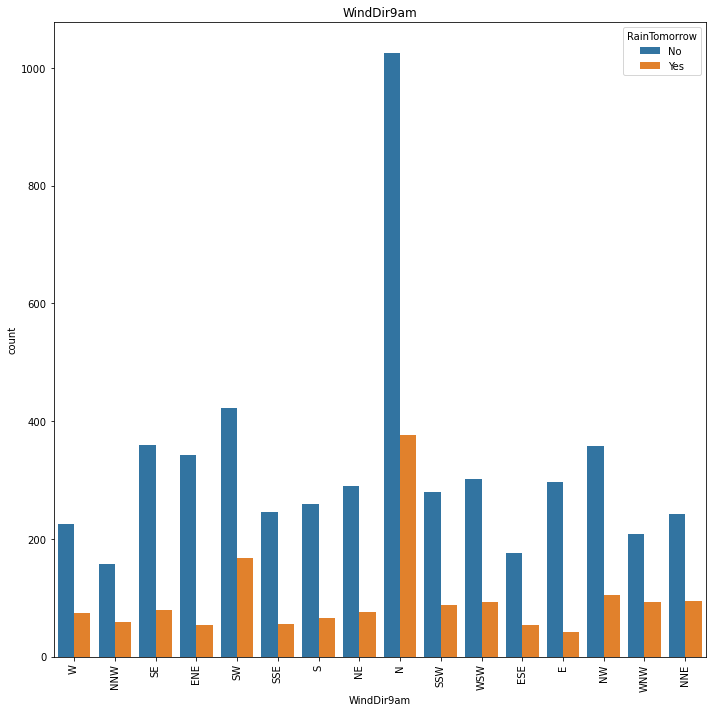

In [113]:
plt.figure(figsize = (10,10))
sns.countplot( df['WindDir9am'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir9am')
plt.title('WindDir9am')
plt.xticks(rotation=90)
plt.show()

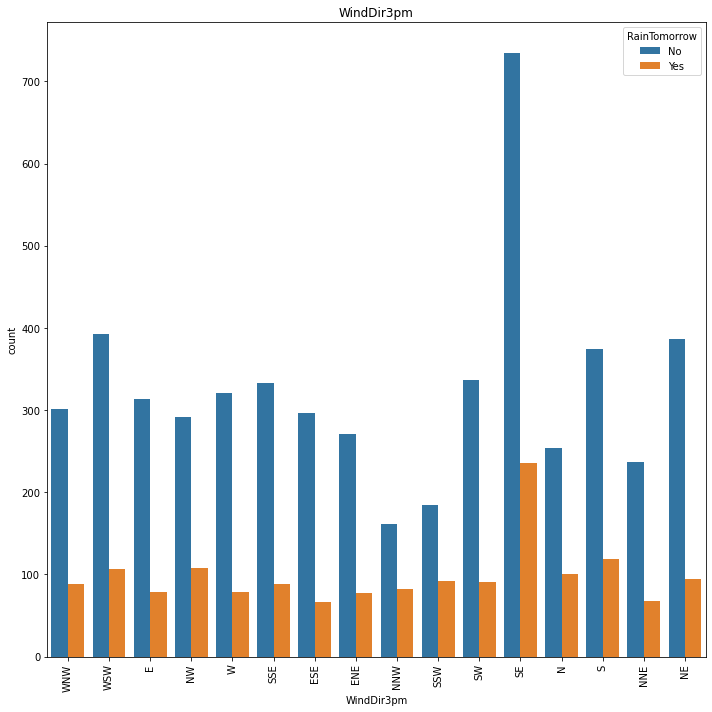

In [114]:
plt.figure(figsize = (10,10))
sns.countplot( df['WindDir3pm'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir3pm')
plt.title('WindDir3pm')
plt.xticks(rotation=90)
plt.show()

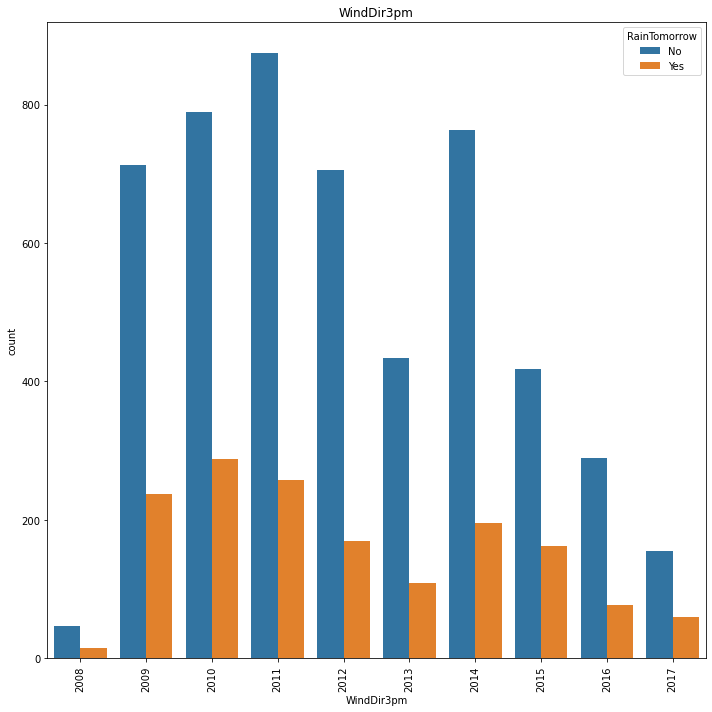

In [115]:
plt.figure(figsize = (10,10))
sns.countplot( df['Year'],hue=df['RainTomorrow'],data=df )
plt.xlabel('WindDir3pm')
plt.title('WindDir3pm')
plt.xticks(rotation=90)
plt.show()

# Encoding categorical data

In [116]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,1007.8,7.0,7.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,1012.8,7.0,7.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [117]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], int64: ['Year', 'Month', 'Day'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']}

# Feature selection and Engineering

##### 1. Outliers Detection and Removal

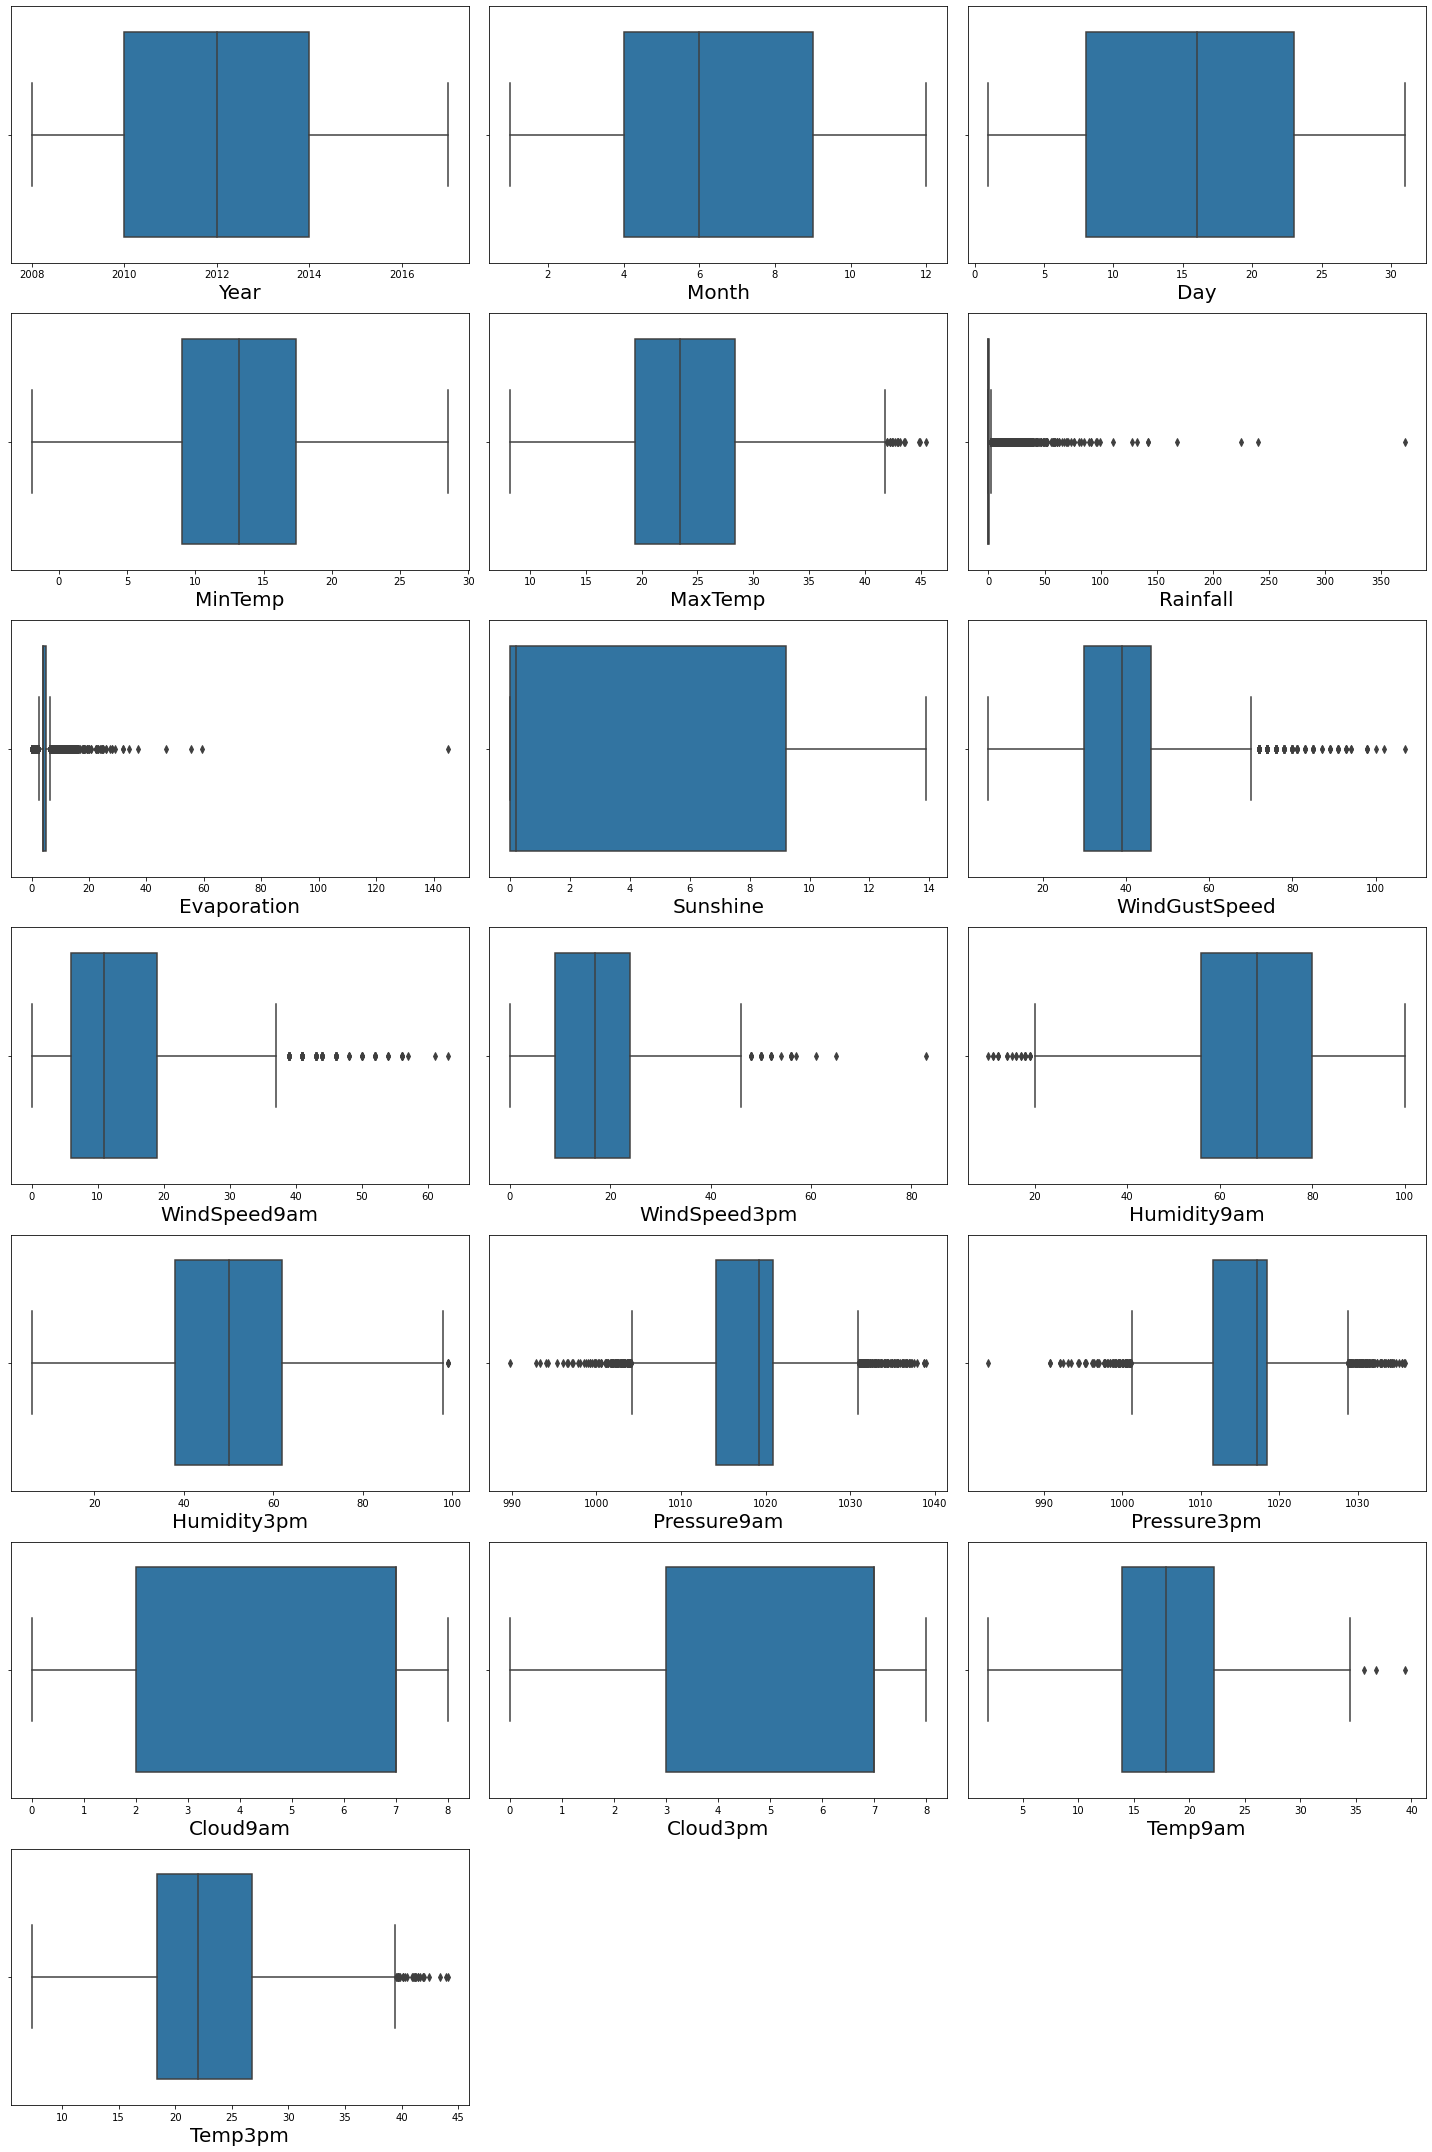

In [118]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [119]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (6762, 25)
Shape of the dataframe after removing outliers:  (6409, 25)
Percentage of data loss post outlier removal:  5.220349009168885


##### 2. Skewness

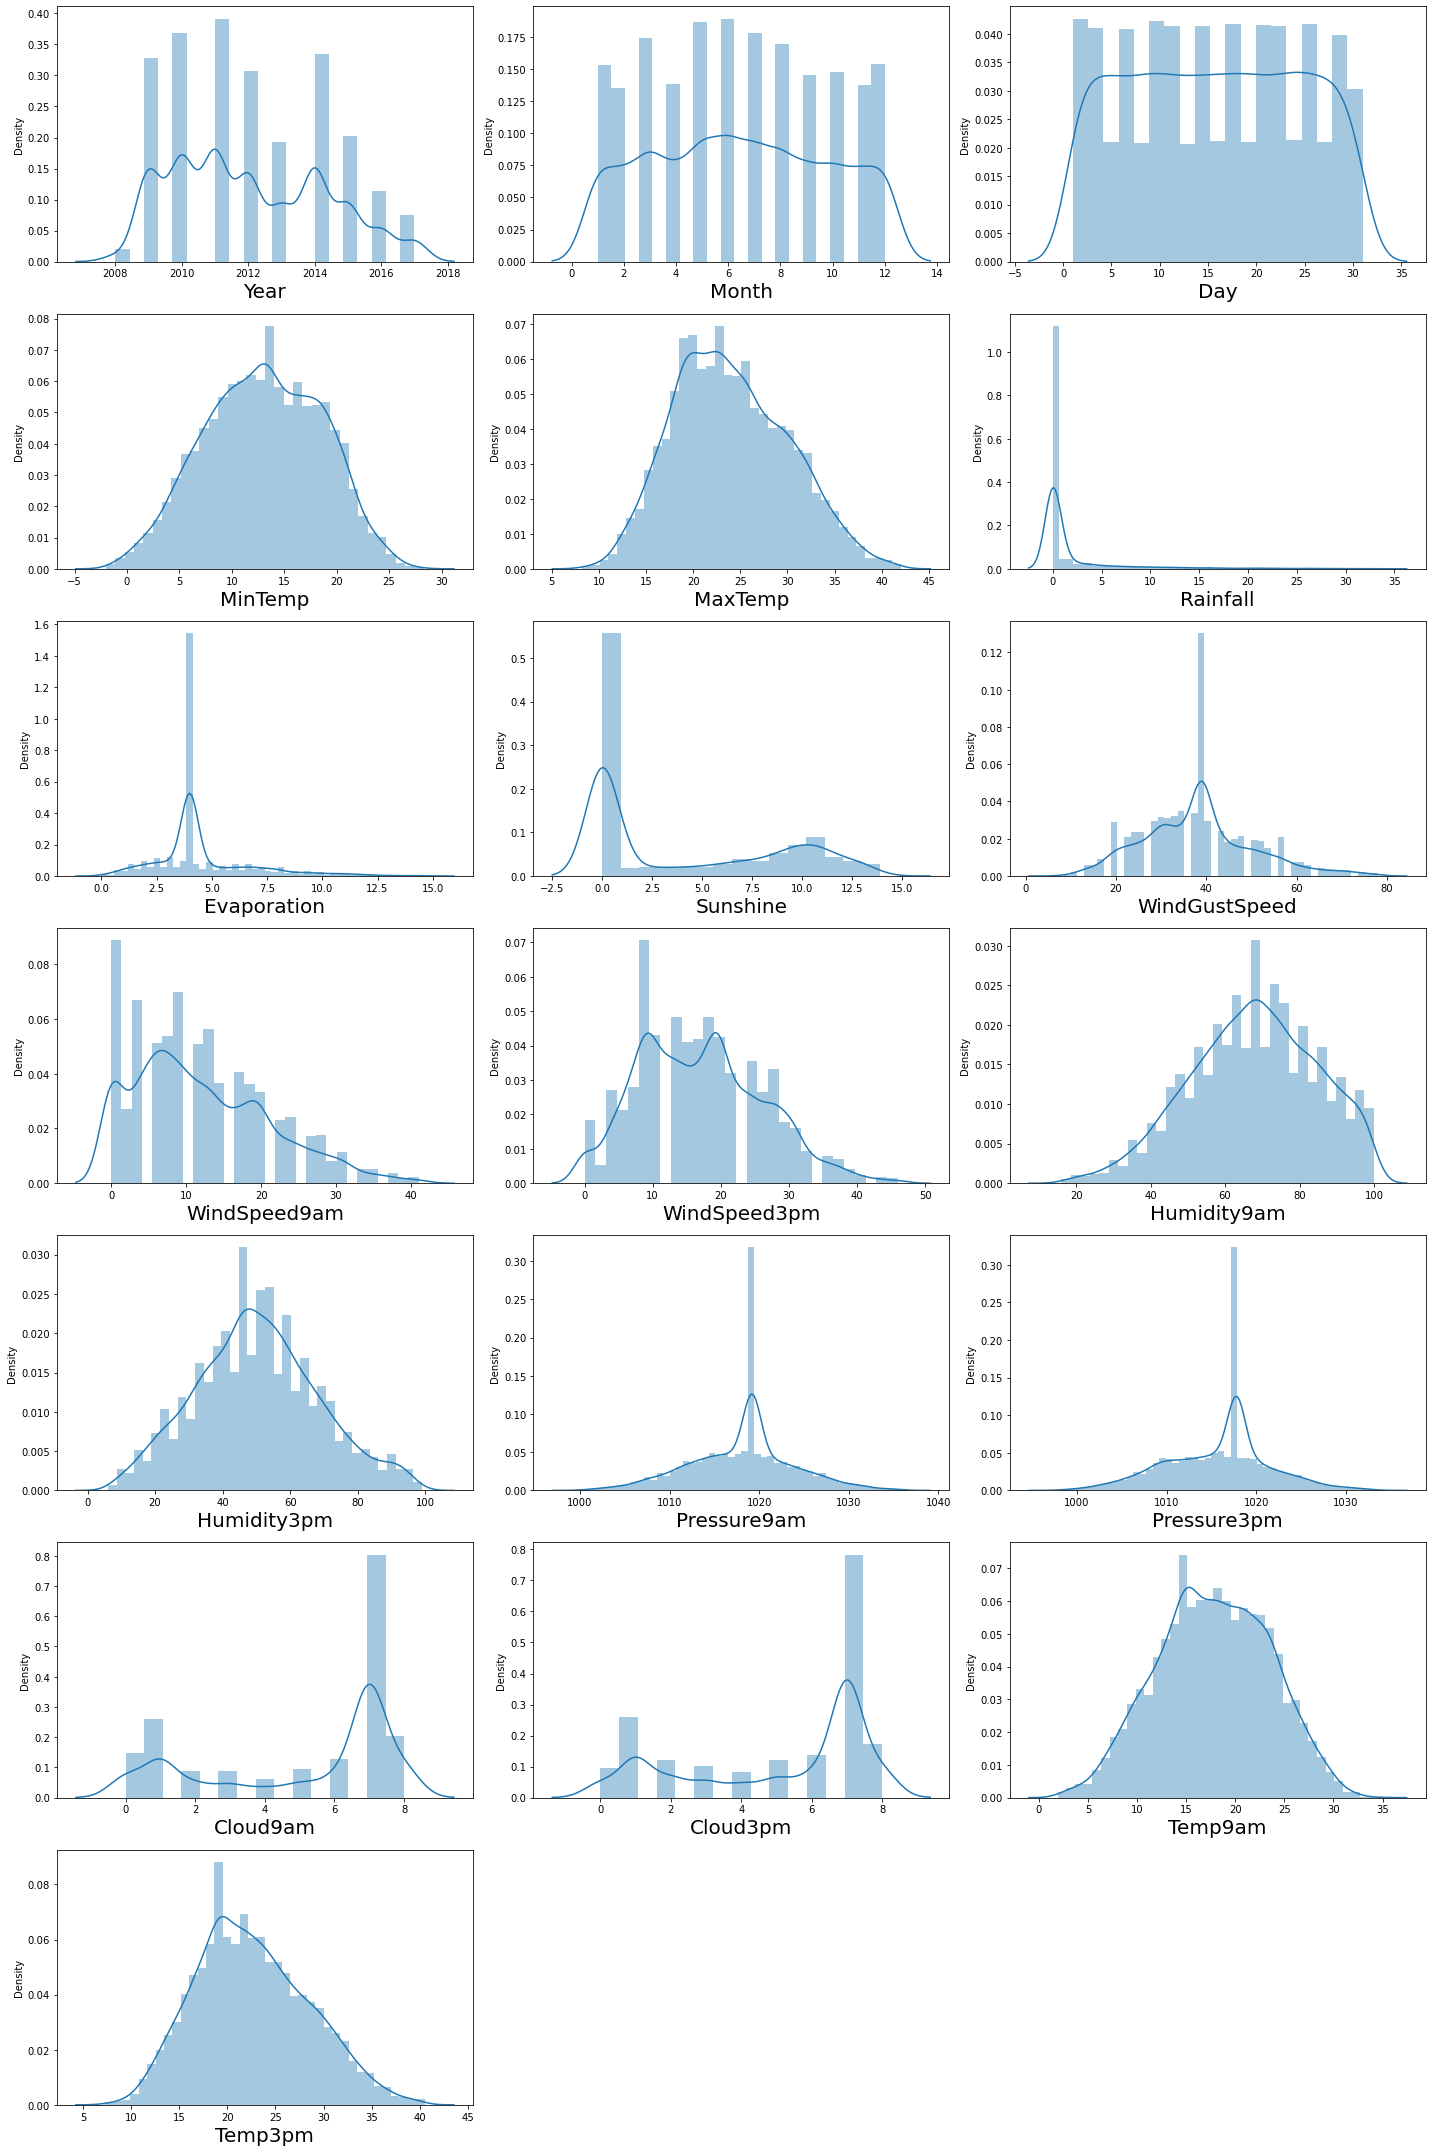

In [120]:
plt.figure(figsize=(20,30))
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [121]:
df[Numerical].skew()

Year             0.354258
Month            0.032874
Day              0.004713
MinTemp         -0.079890
MaxTemp          0.278913
Rainfall         3.523328
Evaporation      1.380673
Sunshine         0.537630
WindGustSpeed    0.475616
WindSpeed9am     0.678574
WindSpeed3pm     0.368378
Humidity9am     -0.235198
Humidity3pm      0.166703
Pressure9am     -0.076317
Pressure3pm     -0.157090
Cloud9am        -0.706427
Cloud3pm        -0.670433
Temp9am         -0.061648
Temp3pm          0.308816
dtype: float64

In [122]:
skew=['Rainfall','Evaporation']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [123]:
df[skew].skew()

Rainfall       1.065080
Evaporation    0.031559
dtype: float64

###### 3. Corrleation

In [124]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,1.000000,0.092285,0.072328,0.003300,0.098798,0.015532,-0.086987,0.275678,-0.102565,0.000202,...,0.012903,-0.036002,-0.039771,0.097818,0.067539,-0.003733,0.001411,0.504792,-0.070539,-0.005411
MinTemp,0.092285,1.000000,0.728443,0.071642,0.400238,0.180998,-0.142803,0.245407,-0.020504,-0.142081,...,-0.454172,0.004068,-0.050529,0.891649,0.700811,0.073027,0.093391,0.034988,-0.235466,0.016732
MaxTemp,0.072328,0.728443,1.000000,-0.246496,0.495718,0.314232,-0.193372,0.171154,-0.187997,-0.164016,...,-0.429863,-0.235620,-0.240997,0.863791,0.973519,-0.216484,-0.154453,0.080110,-0.168599,0.018561
Rainfall,0.003300,0.071642,-0.246496,1.000000,-0.216299,-0.176546,0.112815,0.070959,0.153047,0.113657,...,-0.020665,0.235466,0.199891,-0.105273,-0.258528,0.931553,0.328975,0.007246,-0.006304,-0.009394
Evaporation,0.098798,0.400238,0.495718,-0.216299,1.000000,0.306660,-0.103521,0.220625,-0.094631,-0.031189,...,-0.310297,-0.169108,-0.205005,0.478132,0.481746,-0.186103,-0.110467,0.062443,-0.031503,0.006971
Sunshine,0.015532,0.180998,0.314232,-0.176546,0.306660,1.000000,0.027920,0.123468,0.021646,-0.063984,...,-0.155451,-0.587775,-0.573217,0.335968,0.313439,-0.141071,-0.196665,-0.255992,0.009525,0.000785
WindGustDir,-0.086987,-0.142803,-0.193372,0.112815,-0.103521,0.027920,1.000000,-0.005750,0.381869,0.455785,...,-0.073106,0.170465,0.125894,-0.153397,-0.203144,0.108362,0.033631,-0.184430,0.031941,0.017297
WindGustSpeed,0.275678,0.245407,0.171154,0.070959,0.220625,0.123468,-0.005750,1.000000,-0.070583,0.090987,...,-0.338460,-0.053059,-0.034754,0.225302,0.139644,0.077720,0.164024,-0.013030,0.049559,-0.005514
WindDir9am,-0.102565,-0.020504,-0.187997,0.153047,-0.094631,0.021646,0.381869,-0.070583,1.000000,0.207855,...,0.031517,0.063104,0.046850,-0.062142,-0.195869,0.150062,0.034036,-0.082837,0.020791,-0.007926
WindDir3pm,0.000202,-0.142081,-0.164016,0.113657,-0.031189,-0.063984,0.455785,0.090987,0.207855,1.000000,...,-0.040723,0.079903,0.057888,-0.149083,-0.176886,0.094987,-0.000685,0.005419,0.029490,0.001167


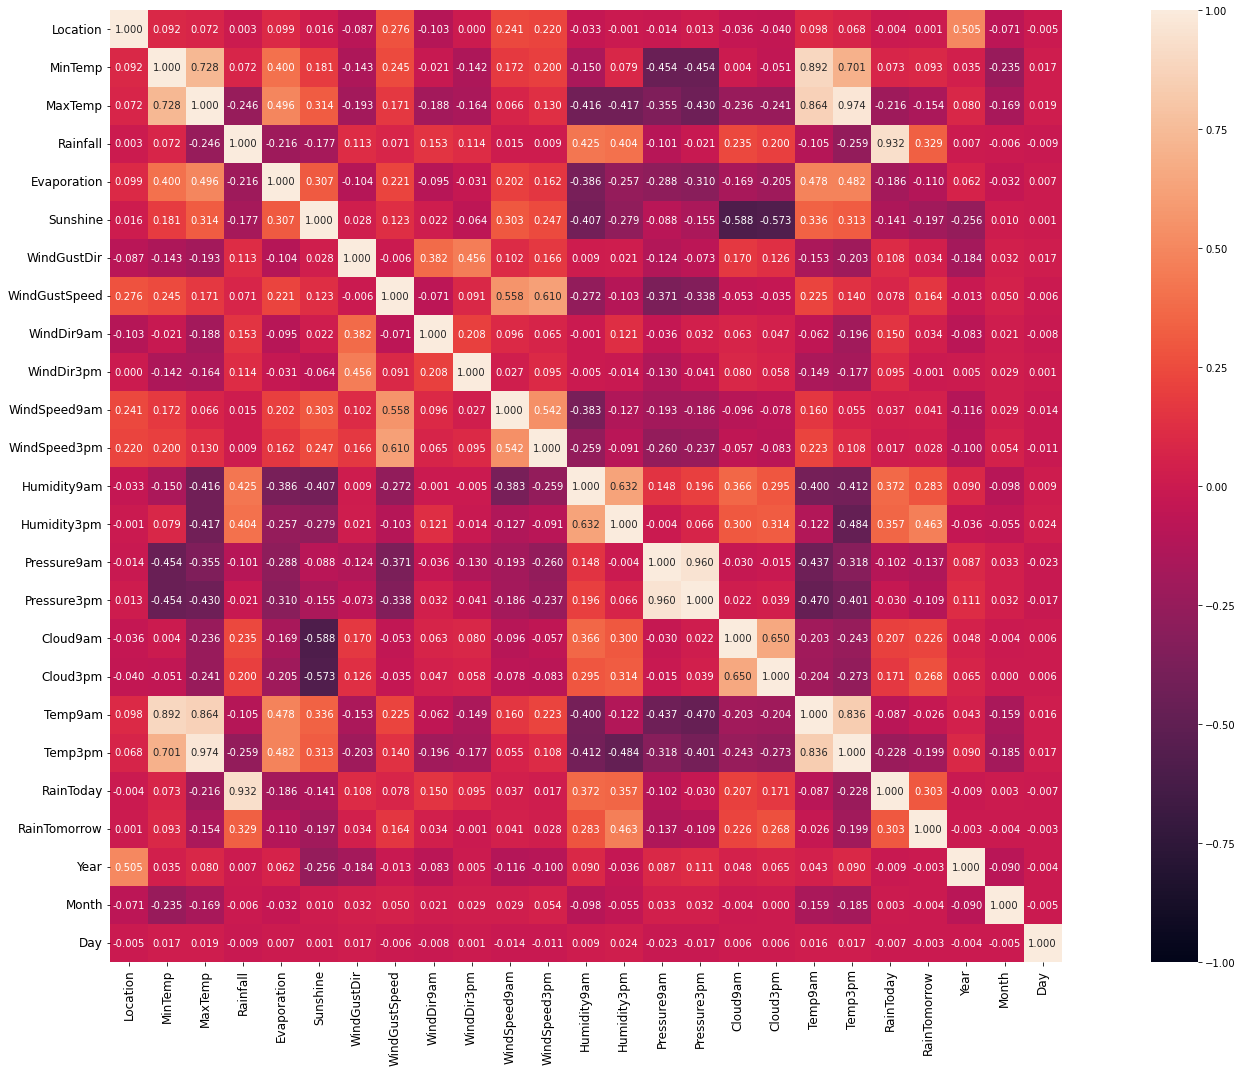

In [125]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10},)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

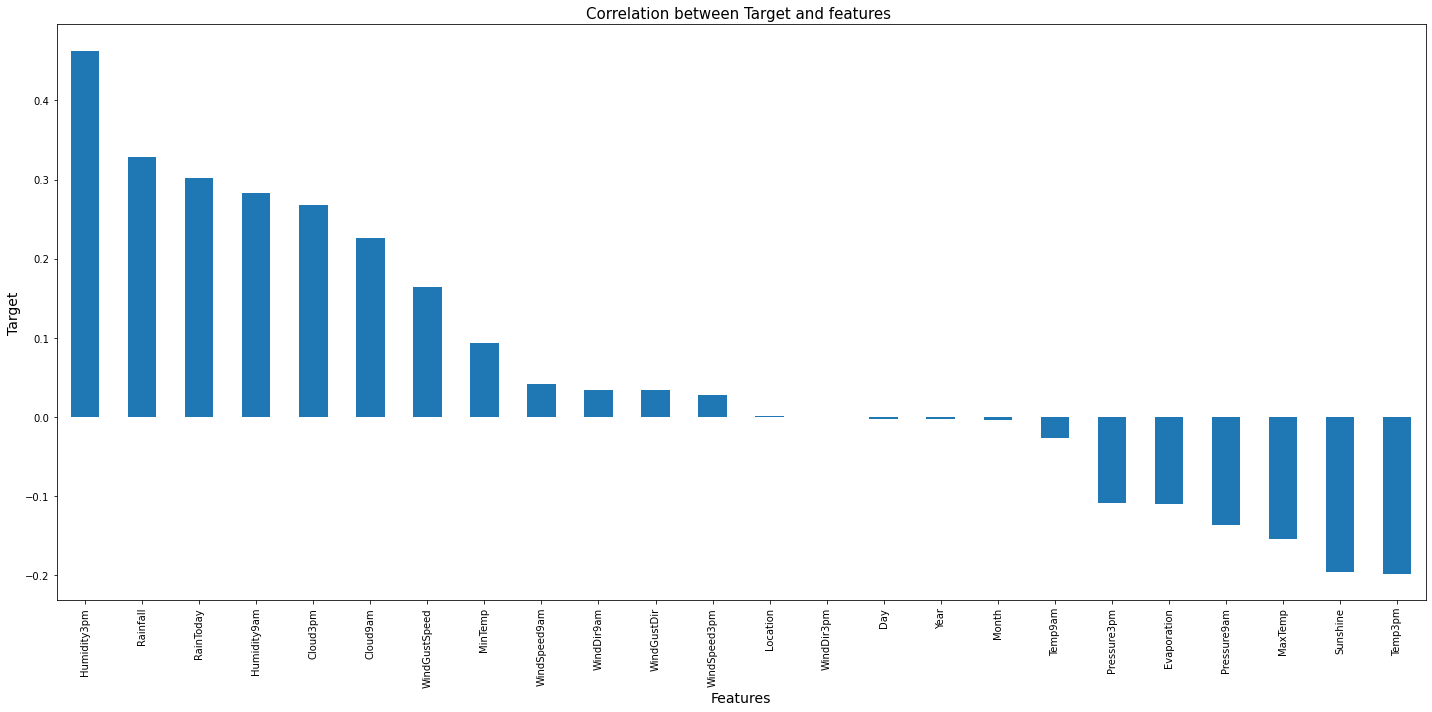

In [126]:
plt.figure(figsize=(20,10))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

'Temp3pm' is highely negativily corealted.



###### 4. Balanceing Imbalanced target feature

In [127]:
df['RainTomorrow'].value_counts()

0    4983
1    1426
Name: RainTomorrow, dtype: int64

In [128]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']

In [129]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [130]:
Y.value_counts()

0    4983
1    4983
Name: RainTomorrow, dtype: int64

In [131]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

###### 5. Checking Multicollinearity between features using variance_inflation_factor

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.660716,Location
1,10.000379,MinTemp
2,24.335741,MaxTemp
3,4.250832,Rainfall
4,1.493017,Evaporation
5,2.339002,Sunshine
6,1.613699,WindGustDir
7,2.178278,WindGustSpeed
8,1.365841,WindDir9am
9,1.431297,WindDir3pm


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.

# PCA

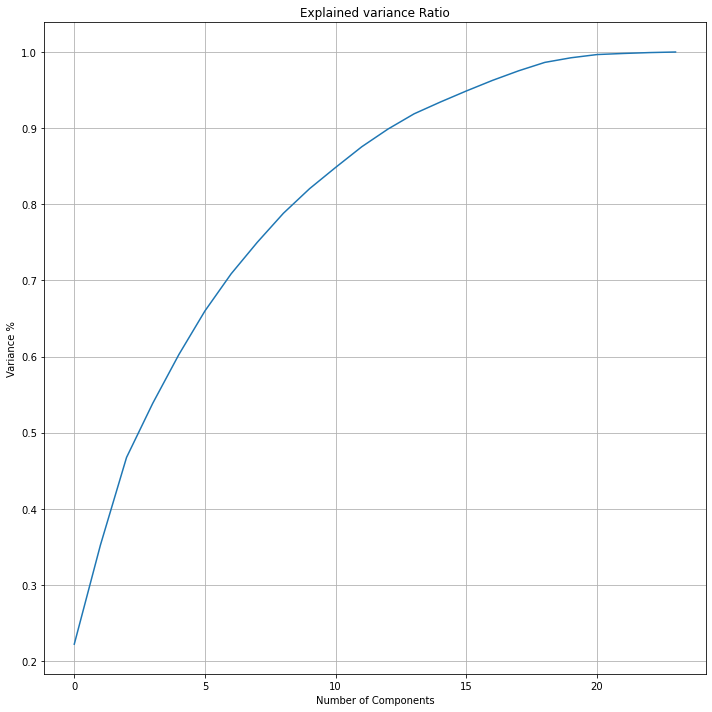

In [133]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [134]:
pca_new = PCA(n_components=20)
x_new = pca_new.fit_transform(X_scale)

In [135]:
principle_x=pd.DataFrame(x_new,columns=np.arange(20))

# Model Building for "whether or not it will rain tomorrow"

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.808926780341023 on Random_state 515


In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=515, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.808926780341023


Confusion matrix of Logistics Regression :
 [[804 171]
 [210 809]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       975
           1       0.83      0.79      0.81      1019

    accuracy                           0.81      1994
   macro avg       0.81      0.81      0.81      1994
weighted avg       0.81      0.81      0.81      1994



In [139]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification of ',m,'is')
    print('\n')
    print('Accuracy Score : \n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix : \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(Y_test, y_pred))
    print('\n')
    print('*'*50)

Classification of  LogisticRegression() is


Accuracy Score : 
 0.808926780341023


Confusion matrix : 
 [[804 171]
 [210 809]]


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       975
           1       0.83      0.79      0.81      1019

    accuracy                           0.81      1994
   macro avg       0.81      0.81      0.81      1994
weighted avg       0.81      0.81      0.81      1994



**************************************************
Classification of  SVC() is


Accuracy Score : 
 0.8590772316950852


Confusion matrix : 
 [[817 158]
 [123 896]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       975
           1       0.85      0.88      0.86      1019

    accuracy                           0.86      1994
   macro avg       0.86      0.86      0.86      1994
weighted avg       0.86      0.86      0.86      199

# CrossValidation :

In [141]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, '\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('*'*50)



Cross Validation Score LogisticRegression() 

Score : [0.6439318  0.62117411 0.65479177 0.77069744 0.83893628]
Mean Score : 0.7059062787962483
Std deviation : 0.08429465597967095


**************************************************


Cross Validation Score SVC() 

Score : [0.61885657 0.55444054 0.69091821 0.78725539 0.80481686]
Mean Score : 0.6912575156477964
Std deviation : 0.0959918887134687


**************************************************


Cross Validation Score GaussianNB() 

Score : [0.65997994 0.59658806 0.69693929 0.78775715 0.81986954]
Mean Score : 0.7122267957912876
Std deviation : 0.08200921292537836


**************************************************


Cross Validation Score DecisionTreeClassifier() 

Score : [0.66800401 0.58103362 0.72704466 0.77822378 0.80080281]
Mean Score : 0.7110217758141459
Std deviation : 0.07947443089605881


**************************************************


Cross Validation Score KNeighborsClassifier(n_neighbors=3) 

Score : [0.60431294 0

# Hyper Parameter Tuning

In [143]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [146]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10,n_jobs = -1)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [147]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 400}

In [148]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 400, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9102306920762286


Text(0.5, 1.0, 'Confusion Matrix for ExtraTreesClassifier')

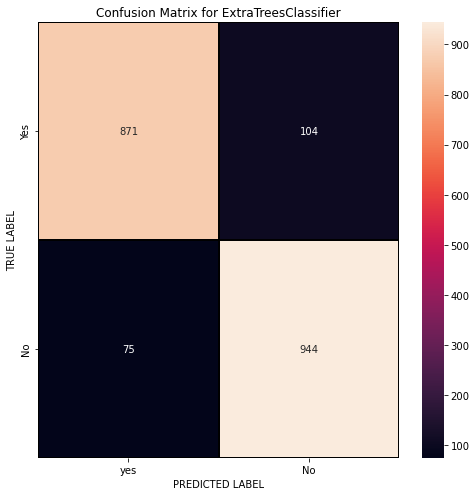

In [150]:
cm = confusion_matrix(Y_test, y_pred)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')

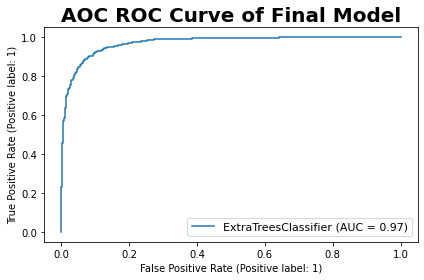

In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))

# Saving the Model:-


In [154]:
import joblib
joblib.dump(Final_mod,'Rainfall_Prediction.pkl')

['Rainfall_Prediction.pkl']

In [157]:
prediction = Final_mod.predict(X_test)

In [159]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
1989,0,0
1990,0,0
1991,1,1
1992,1,1


# Model Building for " predict how much rainfall could be there "

In [255]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [256]:
from sklearn.impute import SimpleImputer
## Startegy most_frequent works both for string or numeric data ,so I am using most_frequent.

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
for i in columns:
    df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))

In [257]:
column = df[['MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
        'Pressure3pm','Temp9am','Temp3pm']]

from scipy.stats import zscore
z=np.abs(zscore(column))
z

,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.151011,0.206021,0.2071,0.287630,0.611153,0.572321,0.187215,1.599484,1.493738,1.357790,0.150064,0.101753
1,0.208009,0.264165,0.2071,0.287630,0.967014,0.367461,1.421959,1.435688,1.037704,1.246435,0.096617,0.318031
2,0.305923,0.264165,0.2071,0.432763,0.512518,0.777182,1.779553,1.162693,1.509464,1.103264,0.580367,0.133326
3,0.681262,0.264165,0.2071,1.163698,0.276566,0.964134,1.362360,1.927077,0.063067,0.451043,0.063721,0.687441
4,1.382983,0.167258,0.2071,0.069931,0.671107,0.162600,0.842805,0.998897,1.006254,1.532776,0.010275,1.224763
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.069416,0.264165,0.2071,0.655733,0.079295,0.759274,1.004766,1.490286,1.163839,0.742046,1.361509,0.001004
8421,0.240647,0.264165,0.2071,1.308831,0.079295,0.964134,0.706770,1.654083,0.990861,0.551152,1.218986,0.351614
8422,0.501752,0.264165,0.2071,0.220335,0.473836,0.964134,0.885568,1.490286,0.597728,0.185271,0.933940,0.620275
8423,0.518071,0.264165,0.2071,0.873433,0.079295,1.168995,1.004766,1.490286,0.346123,0.137548,0.470740,0.603484


In [258]:
threshold = 3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  466,  563,  568,  568,  569,  683,
         683,  699,  713,  748,  770,  796,  797,  802,  928,  935,  949,
         979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151,
        1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413,
        1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
        1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063, 2074,
        2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488,
        2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891, 2897,
        2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947,
        2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3059,
        3060, 3066, 3067, 3067, 3067, 

In [259]:
df_new =df[(z<3).all(axis=1)]
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [260]:
 df_new.drop('Date',axis=1,inplace = True)

In [261]:
col =['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[col]= df_new[col].apply(le.fit_transform)

In [262]:
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [263]:
#assign the value of x and y for training and testing phase
xr = df_new.drop('Rainfall',axis=1)
yr = df_new["Rainfall"]
print(xr.shape)
print(yr.shape)

(7986, 21)
(7986,)


In [264]:
sc = StandardScaler()
sc.fit_transform(xr)

array([[-1.50779508,  0.0593556 , -0.13814711, ..., -0.090778  ,
        -0.54290614, -0.54367939],
       [-1.50779508, -1.0547477 ,  0.22728609, ...,  0.33671111,
        -0.54290614, -0.54367939],
       [-1.50779508, -0.03348634,  0.3269497 , ...,  0.1486159 ,
        -0.54290614, -0.54367939],
       ...,
       [ 1.02994332, -1.42611547,  0.5262769 , ...,  0.64450327,
        -0.54290614, -0.54367939],
       [ 1.02994332, -0.98047415,  0.5428875 , ...,  0.62740371,
        -0.54290614, -0.54367939],
       [ 1.02994332,  0.33788143, -0.78596053, ..., -0.24467408,
        -0.54290614, -0.54367939]])

In [265]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [266]:
from sklearn.ensemble import RandomForestRegressor
maxscore=0
maxRS=0
for i in range(1,200):
    xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.30,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(xr_train,yr_train)
    pred = rfr.predict(xr_test)
    score = r2_score(yr_test,pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
print("Maximum r2 score is ",maxscore,"at Random_state",maxRS)

Maximum r2 score is  0.6776081169545384 at Random_state 9


In [272]:
xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=.30,random_state=9)

In [274]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(xr_train,yr_train)
    m.score(xr_train,yr_train)
    y_pred = m.predict(xr_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(yr_test,y_pred))
    print('Mean squared error :', mean_squared_error(yr_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(yr_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(yr_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.9803622704507512
Mean squared error : 7.270605339732887
Root Mean Squared Error: 2.696406004245816


 R2 Score :
0.6722553332090133


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 1.4790685506557604
Mean squared error : 10.898423354151001
Root Mean Squared Error: 3.3012760190797437


 R2 Score :
0.5087203934405063


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0845158597662772
Mean squared error : 12.941214524207012
Root Mean Squared Error: 3.5973899599858523


 R2 Score :
0.41663536336814455


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 1.4225885659435502
Mean squared error : 11.633914496123209
Root Mean Squared Error: 3.4108524588617444


 R2 Score :
0.4755658914438047


 Error of  GradientBoostingRegressor() :
Mean absolute error : 1.1918626473075642
Mean squared error : 9.425608317197941
Root Mean Squared Error: 3.070115358939781


 R2 Score :
0.5751120143545181


 Erro

In [275]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, xr, yr, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5811008752798064


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.489334454599723


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.2556277543756062


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.45032535566589404


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.5239515770246231


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lamb

##### HyperParameter Tuning

In [276]:
from sklearn.model_selection import GridSearchCV

In [288]:
rf = RandomForestRegressor()
parameters={'n_estimators' : [100,200],'criterion':['mse','mae']}
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(xr_train,yr_train)
gridsearch.best_params_

{'criterion': 'mse', 'n_estimators': 200}

In [290]:
## providing best parameters:-
rf = RandomForestRegressor(criterion='mse',n_estimators=200)
rf.fit(xr_train,yr_train)
pred = rf.predict(xr_test)
score = r2_score(yr_test,pred)
score

0.6708721097486745

In [293]:
a =np.array(yr_test)
predicted = np.array(rfr.predict(xr_test))
df_concluded =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df_concluded

,Original,predicted
0,0.0,0.202
1,0.0,0.034
2,0.0,0.006
3,0.4,0.446
4,0.0,0.064
...,...,...
2391,0.0,0.000
2392,0.0,0.032
2393,18.4,13.234
2394,6.2,10.046
